In [1]:
import numpy as np
import matplotlib.pyplot as plt

reg = np.load('fits/log_good_lf.npz', allow_pickle=True)
# reg = np.load('fits/good_lf.npz', allow_pickle=True)
# qui = np.load('fits/qui_good_lf.npz', allow_pickle=True)
qui = np.load('fits/qui_log_good_lf.npz', allow_pickle=True)
sf = np.load('fits/sf_log_good_lf.npz', allow_pickle=True)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Cambria']
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Cambria'
plt.rcParams['mathtext.it'] = 'Cambria:italic'
plt.rcParams['mathtext.bf'] = 'Cambria:bold'
plt.rcParams['axes.formatter.use_mathtext'] = True

### Luminosity Function

C:\Users\danie\AppData\Local\Temp\ipykernel_4176\4152178732.py:115: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(l), np.log10(schechter_luminosity(l, *params)), label='Schechter Fit' if i == 0 else "", color='red', linestyle='--')
C:\Users\danie\AppData\Local\Temp\ipykernel_4176\4152178732.py:119: RuntimeWarning: divide by zero encountered in log10
  np.log10(schechter_luminosity(l, *p_down)),
C:\Users\danie\AppData\Local\Temp\ipykernel_4176\4152178732.py:120: RuntimeWarning: divide by zero encountered in log10
  np.log10(schechter_luminosity(l, *p_up)),


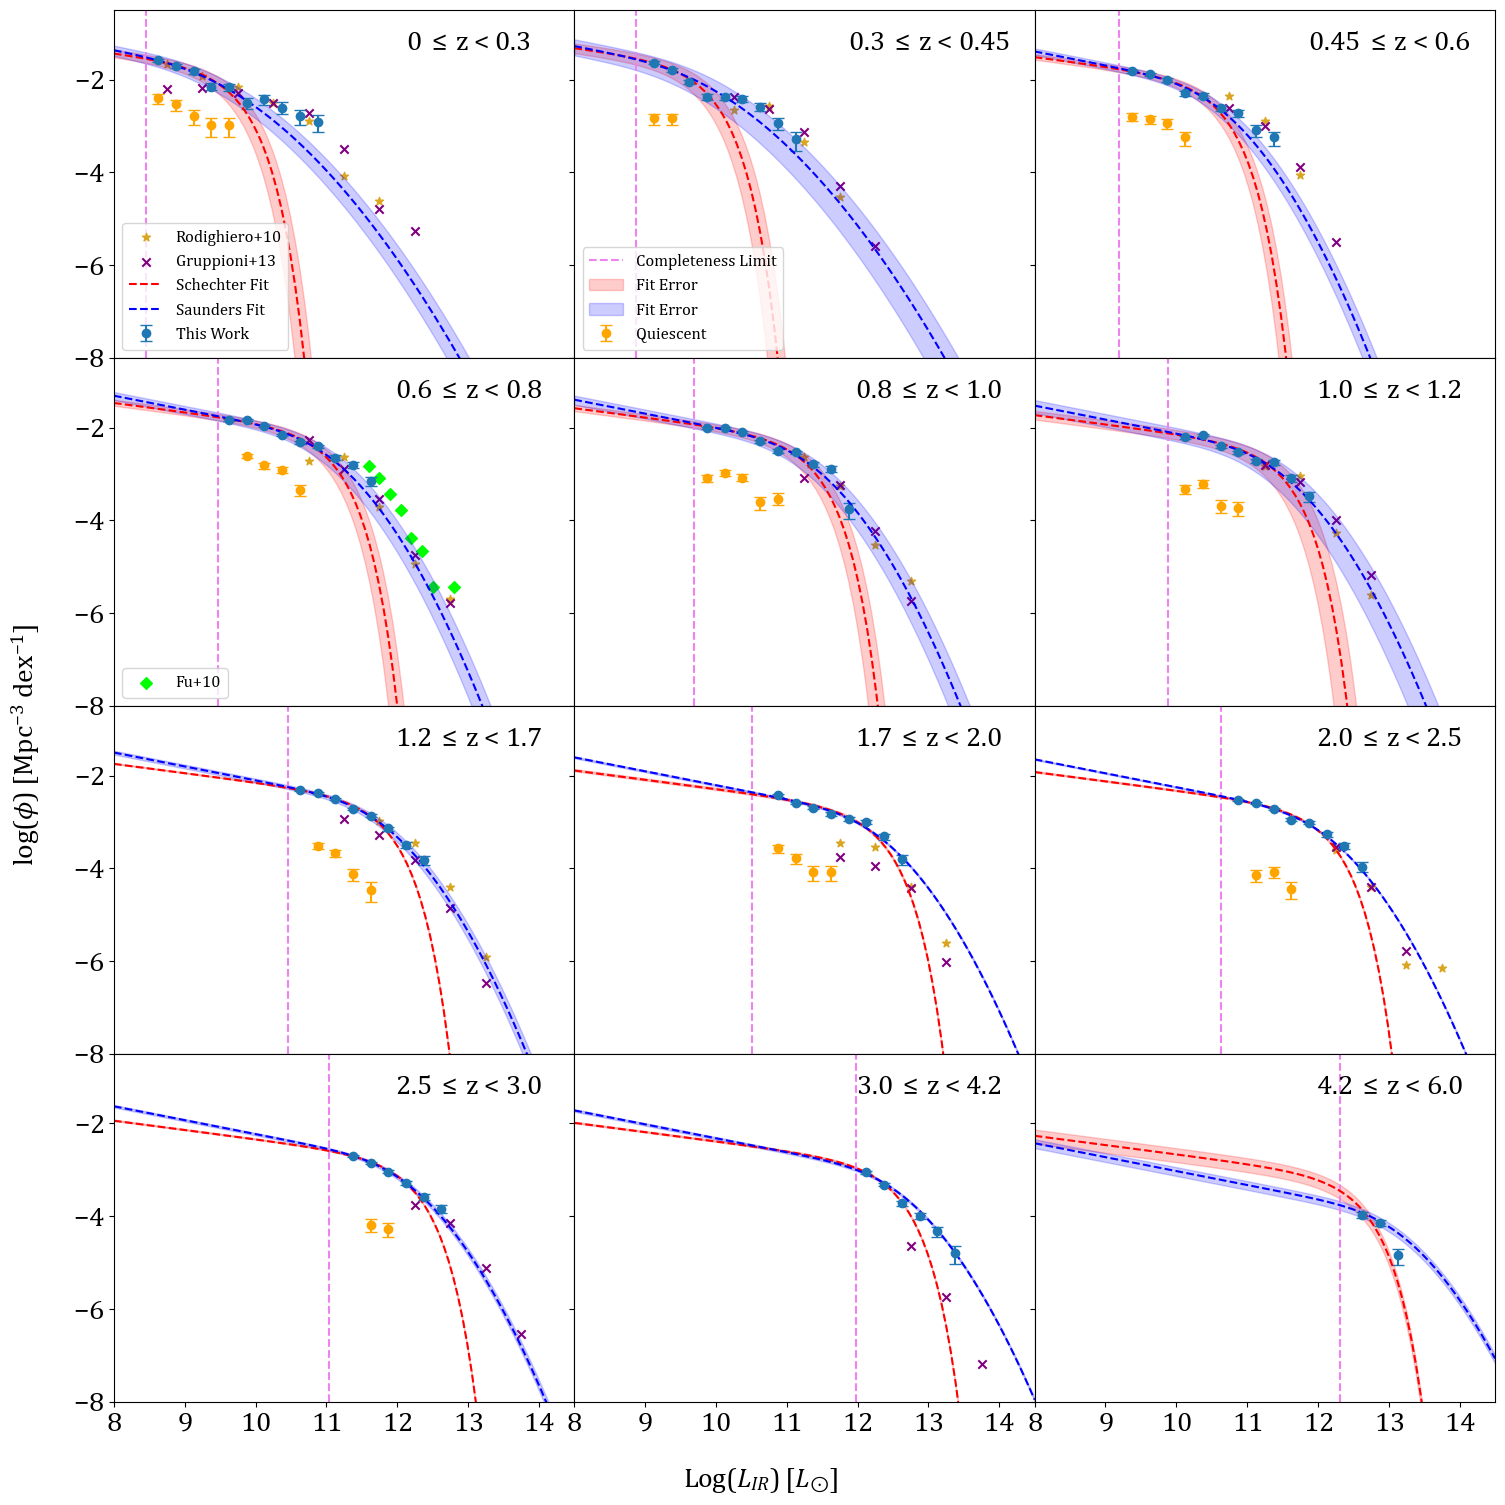

In [2]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()

# def schechter_luminosity(L, L_star, phi_star):
#     return phi_star * 10 ** (-0.4*(1-1.2)*(L_star-L)) * np.exp(-10.**(-0.4*(L_star-L)))

# def saunders_luminosity(L, L_star, phi_star):
#     return phi_star * 10 ** (-0.4*(1-1.2)*(L_star-L)) * np.exp(-1 / (2 * 0.2 ** 2) * (np.log10(1 + 10 ** (-0.4 * (L_star-L))))**2)

# def local_saunders_luminosity(L, L_star, phi_star):
#     return phi_star * 10 ** (-0.4*(1-2)*(L_star-L)) * np.exp(-1 / (2 * 0.4 ** 2) * (np.log10(1 + 10 ** (-0.4 * (L_star-L))))**2)

def schechter_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.2) * np.exp(-L / L_star)

def saunders_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * 0.6 ** 2) * (np.log10(1 + (L / L_star)))**2)

def local_saunders_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * 0.9 ** 2) * (np.log10(1 + (L / L_star)))**2)
        
# Rodighiero 
R_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75] # 0 < z < 0.3
R_L_04 =                   [10.25, 10.75, 11.25, 11.75] # 0.3 < z < 0.45
R_L_06 =                          [10.75, 11.25, 11.75] # 0.45 < z < 0.6
R_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
R_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
R_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
R_L_17 =                                        [11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
R_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
R_L_25 =                                               [12.25, 12.75, 13.25, 13.75] # 2 < z < 2.5
R_L = [R_L_03, R_L_04, R_L_06, R_L_08, R_L_10, R_L_12, R_L_17, R_L_20, R_L_25]

R_P_03 = [-1.67, -1.93, -2.17, -2.51, -2.90, -4.07, -4.61] # 0 < z < 0.3
R_P_04 =                      [-2.65, -2.56, -3.34, -4.52] # 0.3 < z < 0.45
R_P_06 =                             [-2.36, -2.89, -4.05] # 0.45 < z < 0.6
R_P_08 =                             [-2.72, -2.64, -3.72, -4.94, -5.7] # 0.6 < z < 0.8
R_P_10 =                                    [-2.64, -3.27, -4.54, -5.3] # 0.8 < z < 1.0
R_P_12 =                                    [-2.83, -3.05, -4.28, -5.6] # 1.0 < z < 1.2
R_P_17 =                                           [-2.97, -3.46, -4.4, -5.92] # 1.2 < z < 1.7
R_P_20 =                                           [-3.45, -3.54, -4.4, -5.61] # 1.7 < z < 2
R_P_25 =                                                  [-3.61, -4.4, -6.09, -6.15] # 2 < z < 2.5
R_P = [R_P_03, R_P_04, R_P_06, R_P_08, R_P_10, R_P_12, R_P_17, R_P_20, R_P_25]

# Gruppioni
G_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25] # 0.0 < z < 0.3
G_L_04 =                   [10.25, 10.75, 11.25, 11.75, 12.25] # 0.3 < z < 0.45
G_L_06 =                          [10.75, 11.25, 11.75, 12.25] # 0.45 < z < 0.6
G_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
G_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
G_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
G_L_17 =                                 [11.25, 11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
G_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
G_L_25 =                                               [12.25, 12.75, 13.25] # 2 < z < 2.5
G_L_30 =                                               [12.25, 12.75, 13.25, 13.75] # 2.5 < z < 3
G_L_42 =                                                      [12.75, 13.25, 13.75] # 3 < z < 4.2
G_L = [G_L_03, G_L_04, G_L_06, G_L_08, G_L_10, G_L_12, G_L_17, G_L_20, G_L_25, G_L_30, G_L_42]

G_P_03 = [-2.21, -2.18, -2.28, -2.50, -2.71, -3.49, -4.79, -5.27] # 0.0 < z < 0.3
G_P_04 =                      [-2.37, -2.64, -3.12, -4.29, -5.58] # 0.3 < z < 0.45
G_P_06 =                             [-2.61, -2.99, -3.89, -5.50] # 0.45 < z < 0.6
G_P_08 =                             [-2.27, -2.89, -3.53, -4.75, -5.79] # 0.6 < z < 0.8    
G_P_10 =                                    [-3.09, -3.24, -4.23, -5.74] # 0.8 < z < 1.0
G_P_12 =                                    [-2.80, -3.17, -4.00, -5.18] # 1.0 < z < 1.2
G_P_17 =                                    [-2.93, -3.29, -3.81, -4.85, -6.48] # 1.2 < z < 1.7
G_P_20 =                                           [-3.76, -3.96, -4.42, -6.01] # 1.7 < z < 2
G_P_25 =                                                  [-3.53, -4.40, -5.79] # 2 < z < 2.5
G_P_30 =                                                  [-3.75, -4.15, -5.11, -6.54] # 2.5 < z < 3
G_P_42 =                                                         [-4.65, -5.75, -7.18] # 3 < z < 4.2
G_P = [G_P_03, G_P_04, G_P_06, G_P_08, G_P_10, G_P_12, G_P_17, G_P_20, G_P_25, G_P_30, G_P_42]

# Rodighiero
for i, (ax, lum, phi) in enumerate(zip(axes, R_L, R_P)):
    ax.scatter(lum, phi, color='goldenrod', marker='*', label='Rodighiero+10' if i == 0 else '')
    
# Gruppioni
for i, (ax, lum, phi) in enumerate(zip(axes, G_L, G_P)):
    ax.scatter(lum, phi, color='purple', marker='x', label='Gruppioni+13' if i == 0 else '')

# Fu 0.6 < z < 0.8
axes[3].scatter(x=[11.60, 11.75, 11.90, 12.05, 12.20, 12.35, 12.50, 12.80], y=[-2.83, -3.08, -3.44, -3.78, -4.38, -4.66, -5.43, -5.43], label='Fu+10', marker='D', color='lime')

# This work
for i, (ax, l, p, e) in enumerate(zip(axes, reg['x'], reg['y'], reg['e'])):
    if len(p) == 0:
        continue
    yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', capsize=4, label='This Work' if i == 0 else '', color='C0')
    ax.set_xticks([8,9,10,11,12,13,14])
    ax.set_yticks([-8,-6,-4,-2])
    ax.tick_params(axis='both', labelsize=20)
    
# Quiescent
for i, (ax, l, p, e) in enumerate(zip(axes, qui['x'], qui['y'], qui['e'])):
    try:
        yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
        ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', capsize=4, label='Quiescent' if i == 1 else '', color='orange')
    except TypeError:
        continue
    
# # Star Forming
# for i, (ax, l, p, e) in enumerate(zip(axes, sf['x'], sf['y'], sf['e'])):
#     yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
#     ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', capsize=4, label='Star Forming' if i == 1 else '', color='green')
    
# Completeness limits
for i, (ax, min_l) in enumerate(zip(axes, reg['m'])):
    ax.axvline(np.log10(min_l), color='violet', linestyle='--', label='Completeness Limit' if i == 1 else "")

# Schechter fits
l = np.logspace(8, 14.5, 100)
for i, (ax, params, perr) in enumerate(zip(axes, reg['schech_p'], reg['schech_e'])):
    if len(params) == 0:
        continue
    ax.plot(np.log10(l), np.log10(schechter_luminosity(l, *params)), label='Schechter Fit' if i == 0 else "", color='red', linestyle='--')
    p_up = params + perr
    p_down = np.abs(params - perr)
    ax.fill_between(np.log10(l), 
        np.log10(schechter_luminosity(l, *p_down)), 
        np.log10(schechter_luminosity(l, *p_up)), 
        color='red', alpha=0.2, label='Fit Error' if i == 1 else "")
    ax.set_xlim(8, 14)
    ax.set_ylim(-8, -1)
    
# Saunders fits
for i, (ax, params, perr, z) in enumerate(zip(axes, reg['saunder_p'], reg['saunder_e'], reg['z'])):
    if len(params) == 0:
        continue
    if z[0] in [0, 0.3]:
        f = local_saunders_luminosity
    else:
        f = saunders_luminosity
    
    ax.plot(np.log10(l), np.log10(f(l, *params)), label='Saunders Fit' if i == 0 else "", color='blue', linestyle='--')
    p_up = params + perr
    p_down = np.abs(params - perr)
    ax.fill_between(np.log10(l), 
        np.log10(f(l, *p_down)), 
        np.log10(f(l, *p_up)), 
        color='blue', alpha=0.2, label='Fit Error' if i == 1 else "")
    ax.set_xlim(8, 14.5)
    ax.set_ylim(-8, -0.5)
    ax.set_title(f'{z[0]} $\leq$ z < {z[1]}', y=0.86, x=0.77, fontsize=20)

axes[0].legend(loc='lower left', fontsize=12)
axes[1].legend(loc='lower left', fontsize=12)
axes[3].legend(loc='lower left', fontsize=12)
fig.supxlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0, fontsize=20)
fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0, fontsize=20)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('bolo_lf.png')
plt.show()

### "This Work" One Plot

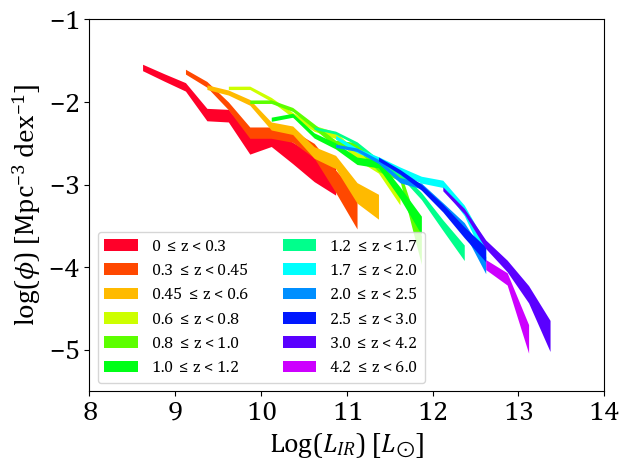

In [3]:
n = len(reg['x'])
cm = plt.get_cmap('gist_rainbow')
fig, ax = plt.subplots()
ax.set_prop_cycle(color=[cm(1.*i/n) for i in range(n)])

for i, (l, p, e, z) in enumerate(zip(reg['x'], reg['y'], reg['e'], reg['z'])):
    # yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    # ax.errorbar(l, np.log10(p), yerr=yerr, fmt='o', capsize=4, label=f'{z[0]} $\leq$ z < {z[1]}')
    if len(p) == 0:
        continue
    p_down = np.log10(p - e)
    p_up = np.log10(p + e)
    ax.fill_between(l, p_down, p_up, label=f'{z[0]} $\leq$ z < {z[1]}')

plt.xlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0.05, fontsize=20)
plt.ylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0.05, fontsize=20)
plt.xlim(8, 14)
plt.ylim(-5.5, -1)
plt.yticks([-5,-4,-3,-2,-1], fontsize=20)
plt.xticks(fontsize=20)
plt.legend(loc='lower left', fontsize=12, ncol=2)
plt.tight_layout()
plt.savefig('bolo_lf_fill.png')
plt.show()

### Parameter Evolution

C:\Users\danie\AppData\Local\Temp\ipykernel_4176\1880396523.py:36: RuntimeWarning: divide by zero encountered in log
  return a * np.log(x) + c


Schechter Lstar: [ 0.94908974 11.16329315] [0.071905   0.07074626]
Schechter phi: [-0.44582242 -2.32700747] [0.03824895 0.03763258]
Saunders Lstar: [ 1.1313887  10.51209844] [0.07455187 0.07335048]
Saunders phi: [-0.56980605 -2.2858696 ] [0.06708276 0.06600173]


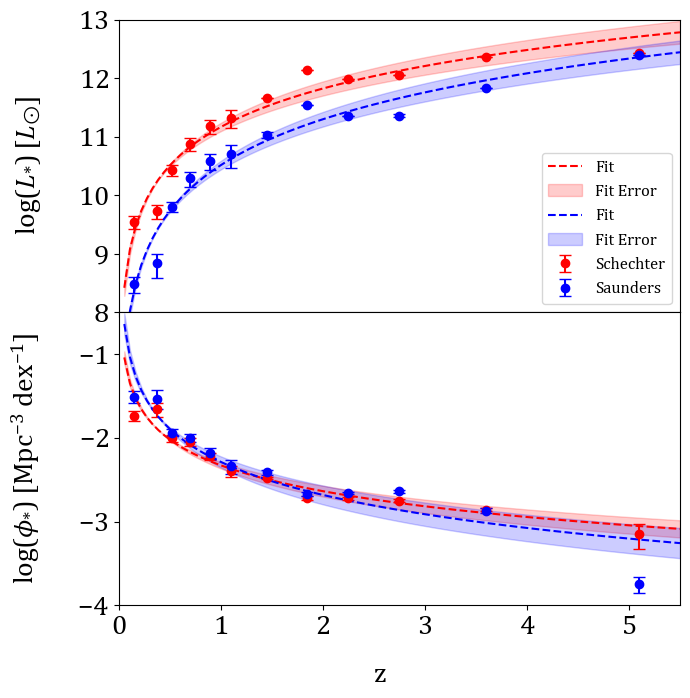

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
z_centers = [(z[0] + z[1]) / 2 for z in reg['z']]
long_z = np.linspace(0, 5.5, 100)

# Schechter Parameters
schech_Lstar_p = np.array(reg['schech_p'][:,0].tolist())
schech_Lstar_e = np.array(reg['schech_e'][:,0].tolist())
schech_phi_p = np.array(reg['schech_p'][:,1].tolist())
schech_phi_e = np.array(reg['schech_e'][:,1].tolist())

# Saunders Parameters
saunders_Lstar_p = np.array(reg['saunder_p'][:,0].tolist())
saunders_Lstar_e = np.array(reg['saunder_e'][:,0].tolist())
saunders_phi_p = np.array(reg['saunder_p'][:,1].tolist())
saunders_phi_e = np.array(reg['saunder_e'][:,1].tolist())

# Schechter Evolution
yerr = [np.log10(schech_Lstar_p) - np.log10(np.abs(schech_Lstar_p - schech_Lstar_e)), np.log10(schech_Lstar_p + schech_Lstar_e) - np.log10(schech_Lstar_p)]
ax[0].errorbar(z_centers, np.log10(schech_Lstar_p), yerr=yerr, fmt='o', capsize=4, color='red', label='Schechter')
# ax[0].errorbar(z_centers, schech_Lstar_p, yerr=schech_Lstar_e, fmt='o', capsize=4, color='red', label='Schechter')
yerr = [np.log10(schech_phi_p) - np.log10(np.abs(schech_phi_p - schech_phi_e)), np.log10(schech_phi_p + schech_phi_e) - np.log10(schech_phi_p)]
ax[1].errorbar(z_centers, np.log10(schech_phi_p), yerr=yerr, fmt='o', capsize=4, color='red')
# ax[1].errorbar(z_centers, schech_phi_p, yerr=schech_phi_e, fmt='o', capsize=4, color='red')

# Saunders Evolution
yerr = [np.log10(saunders_Lstar_p) - np.log10(np.abs(saunders_Lstar_p - saunders_Lstar_e)), np.log10(saunders_Lstar_p + saunders_Lstar_e) - np.log10(saunders_Lstar_p)]
ax[0].errorbar(z_centers, np.log10(saunders_Lstar_p), yerr=yerr, fmt='o', capsize=4, color='blue', label='Saunders')
# ax[0].errorbar(z_centers, saunders_Lstar_p, yerr=saunders_Lstar_e, fmt='o', capsize=4, color='blue', label='Saunders')
yerr = [np.log10(saunders_phi_p) - np.log10(np.abs(saunders_phi_p - saunders_phi_e)), np.log10(saunders_phi_p + saunders_phi_e) - np.log10(saunders_phi_p)]
ax[1].errorbar(z_centers, np.log10(saunders_phi_p), yerr=yerr, fmt='o', capsize=4, color='blue')
# ax[1].errorbar(z_centers, saunders_phi_p, yerr=saunders_phi_e, fmt='o', capsize=4, color='blue')
    
from scipy.optimize import curve_fit

def log_func(x, a, c):
    return a * np.log(x) + c

# Fit Schechter Lstar
params, cov = curve_fit(log_func, z_centers, np.log10(schech_Lstar_p))
# params, cov = curve_fit(log_func, z_centers, schech_Lstar_p, p0=[schech_Lstar_p[0], schech_Lstar_p[0]])
perr = np.sqrt(np.diag(cov))
ax[0].plot(long_z, log_func(long_z, *params), color='red', linestyle='--', label='Fit')
ax[0].fill_between(long_z, log_func(long_z, *(params - perr)), log_func(long_z, *(params + perr)), color='red', alpha=0.2, label='Fit Error')
print('Schechter Lstar:', params, perr)

# Fit Schechter phi
params, cov = curve_fit(log_func, z_centers, np.log10(schech_phi_p))
# params, cov = curve_fit(log_func, z_centers, schech_phi_p, p0=[schech_phi_p[0], schech_phi_p[0]])
perr = np.sqrt(np.diag(cov))
ax[1].plot(long_z, log_func(long_z, *params), color='red', linestyle='--', label='Fit')
ax[1].fill_between(long_z, log_func(long_z, *(params - perr)), log_func(long_z, *(params + perr)), color='red', alpha=0.2, label='Fit Error')
print('Schechter phi:', params, perr)

# Fit Saunders Lstar
params, cov = curve_fit(log_func, z_centers, np.log10(saunders_Lstar_p))
# params, cov = curve_fit(log_func, z_centers, saunders_Lstar_p, p0=[saunders_Lstar_p[0], saunders_Lstar_p[0]])
perr = np.sqrt(np.diag(cov))
ax[0].plot(long_z, log_func(long_z, *params), color='blue', linestyle='--', label='Fit')
ax[0].fill_between(long_z, log_func(long_z, *(params - perr)), log_func(long_z, *(params + perr)), color='blue', alpha=0.2, label='Fit Error')
print('Saunders Lstar:', params, perr)

# Fit Saunders phi
params, cov = curve_fit(log_func, z_centers, np.log10(saunders_phi_p))
# params, cov = curve_fit(log_func, z_centers, saunders_phi_p, p0=[saunders_phi_p[0], saunders_phi_p[0]])
perr = np.sqrt(np.diag(cov))
ax[1].plot(long_z, log_func(long_z, *params), color='blue', linestyle='--', label='Fit')
ax[1].fill_between(long_z, log_func(long_z, *(params - perr)), log_func(long_z, *(params + perr)), color='blue', alpha=0.2, label='Fit Error')
print('Saunders phi:', params, perr)

# Settings
ax[0].set_ylabel('log($L_{*}$) [$L_{\odot}$]', fontsize=20, labelpad=25)
ax[1].set_ylabel('log($\phi_{*}$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20, labelpad=25)
ax[0].legend(loc='lower right', fontsize=12)
ax[1].set_xlim(0, 5.5)
ax[0].set_yticks([8,9,10,11,12,13])
ax[0].tick_params(axis='both', labelsize=20)
ax[1].tick_params(axis='both', labelsize=20)
ax[0].set_ylim(8, 13)
ax[1].set_ylim(-4,-0.5)
# ax[0].set_yscale('log')
# ax[1].set_yscale('log')

fig.supxlabel('z', fontsize=20, x=0.55)
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig('param_evo.png')
plt.show()

### Star Formation Rate Density

Uses Star-forming only

C:\Users\danie\AppData\Local\Temp\ipykernel_4176\1099689585.py:12: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  area, _ = integrate.quad(schechter_luminosity, lower_bound, upper_bound, args=(l_star, phi_star))
C:\Users\danie\AppData\Local\Temp\ipykernel_4176\1099689585.py:14: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  down_area, _ = integrate.quad(schechter_luminosity, lower_bound, upper_bound, args=(l_star - l_e, phi_star - phi_e))
C:\Users\danie\AppData\Local\Temp\ipykernel_4176\1880396523.py:36: RuntimeWarning: divide by zero encountered in log


[9.93737747e+08 1.36512118e+09]
[1.89963089e+08 1.86901874e+08]


[1.18969698e+09 1.74349570e+09]
[2.78788088e+08 2.74295480e+08]


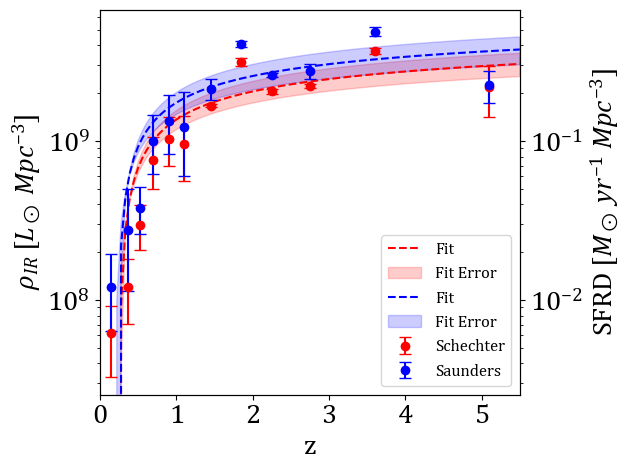

Schechter
0.15 0.29 0.62 0.29
0.375 0.5 1.2 0.62
0.525 0.89 2.95 1.02
0.7 2.58 7.62 3.0
0.9 3.32 10.29 3.82
1.1 4.02 9.61 4.87
1.45 0.41 16.75 0.41
1.85 1.73 31.5 1.73
2.25 0.8 20.56 0.8
2.75 0.74 22.2 0.74
3.6 1.47 36.8 1.47
5.1 7.67 21.92 7.67


Saunders
0.15 0.57 1.22 0.73
0.375 1.62 2.76 2.25
0.525 1.17 3.78 1.35
0.7 3.85 10.06 4.57
0.9 5.16 13.47 6.14
1.1 6.26 12.3 8.01
1.45 3.09 21.37 3.3
1.85 1.81 41.11 1.81
2.25 0.83 26.19 0.83
2.75 2.86 27.46 3.0
3.6 3.04 48.83 3.04
5.1 5.16 22.47 5.16


In [5]:
import scipy.integrate as integrate

# Define the integration limits
lower_bound = 10**8
upper_bound = 10**14

# Integrate the Schechter function
sfrd_schech = []
sfrd_schech_up_err = []
sfdr_schech_down_err = []
for i, ((l_star, phi_star), (l_e, phi_e)) in enumerate(zip(sf['schech_p'], sf['schech_e'])):
    area, _ = integrate.quad(schechter_luminosity, lower_bound, upper_bound, args=(l_star, phi_star))
    up_area, _ = integrate.quad(schechter_luminosity, lower_bound, upper_bound, args=(l_star + l_e, phi_star + phi_e))
    down_area, _ = integrate.quad(schechter_luminosity, lower_bound, upper_bound, args=(l_star - l_e, phi_star - phi_e))
    sfrd_schech.append(area)
    sfrd_schech_up_err.append(up_area)
    sfdr_schech_down_err.append(down_area)
# print(sfdr_schech_down_err[0])
sfdr_schech_down_err[0] = sfrd_schech[0] - (sfrd_schech_up_err[0] - sfrd_schech[0]) # Fix the first point

# Integrate the Saunders function
sfrd_saunder = []
sfrd_saunder_up_err = []
sfrd_saunder_down_err = []
for i, ((l_star, phi_star), (l_e, phi_e)) in enumerate(zip(sf['saunder_p'], sf['saunder_e'])):
    if sf['z'][i][0] in [0, 0.3]:
        f = local_saunders_luminosity
    else:
        f = saunders_luminosity
    area, _ = integrate.quad(f, lower_bound, upper_bound, args=(l_star, phi_star))
    up_area, _ = integrate.quad(f, lower_bound, upper_bound, args=(l_star + l_e, phi_star + phi_e))
    down_area, _ = integrate.quad(f, lower_bound, upper_bound, args=(l_star - l_e, phi_star - phi_e))
    sfrd_saunder.append(area)
    sfrd_saunder_up_err.append(up_area)
    sfrd_saunder_down_err.append(down_area)

# Calculate the relative schechter errors
sfrd_schech = np.array(sfrd_schech)
sfrd_schech_up_err = np.array(sfrd_schech_up_err)
sfrd_schech_down_err = np.array(sfdr_schech_down_err)
schech_relative_up_err = np.abs(sfrd_schech - sfrd_schech_up_err)
schech_relative_down_err = np.abs(sfrd_schech - sfdr_schech_down_err)

# Calculate the relative saunders errors
sfrd_saunder = np.array(sfrd_saunder)
sfrd_saunder_up_err = np.array(sfrd_saunder_up_err)
sfrd_saunder_down_err = np.array(sfrd_saunder_down_err)
saunder_relative_up_err = np.abs(sfrd_saunder - sfrd_saunder_up_err)
saunder_relative_down_err = np.abs(sfrd_saunder - sfrd_saunder_down_err)

# Schechter fit
params, cov = curve_fit(log_func, z_centers, sfrd_schech)
perr = np.sqrt(np.diag(cov))
plt.plot(long_z, log_func(long_z, *params), color='red', linestyle='--', label='Fit')
plt.fill_between(long_z, log_func(long_z, *(params - perr)), log_func(long_z, *(params + perr)), color='red', alpha=0.2, label='Fit Error')
print(params)
print(perr)

# Saunders fit
params, cov = curve_fit(log_func, z_centers, sfrd_saunder)
perr = np.sqrt(np.diag(cov))
plt.plot(long_z, log_func(long_z, *params), color='blue', linestyle='--', label='Fit')
plt.fill_between(long_z, log_func(long_z, *(params - perr)), log_func(long_z, *(params + perr)), color='blue', alpha=0.2, label='Fit Error')
print('\n')
print(params)
print(perr)

sfr_schech = sfrd_schech / (1.7*10**10)

# Plot
plt.errorbar(z_centers, sfrd_schech, yerr=(schech_relative_down_err, schech_relative_up_err), color='red', fmt='o', capsize=4, label='Schechter')
plt.errorbar(z_centers, sfrd_saunder, yerr=(saunder_relative_down_err, saunder_relative_up_err), color='blue', fmt='o', capsize=4, label='Saunders')
plt.ylabel(r'$\rho_{IR}$ [$L_\odot$ $Mpc^{-3}$]', fontsize=20)
plt.xlabel('z', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(0, 5.5)
plt.yscale('log')
plt.legend(loc='lower right', fontsize=12)

ymin, ymax = plt.ylim()
plt.twinx()
plt.yscale('log')
plt.ylim(ymin / (10**10), ymax / (10**10))
plt.scatter(z_centers, sfr_schech, color='red', alpha=0)
plt.ylabel('SFRD [$M_\odot$ $yr^{-1}$ $Mpc^{-3}$]', fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.savefig('sfrd.png')
plt.show()

# Schechter
print('Schechter')
for i in range(len(sfrd_schech)):
    print(z_centers[i], np.round((sfrd_schech[i] - sfrd_schech_down_err[i])/10**8,2), np.round(sfrd_schech[i]/10**8,2), np.round((sfrd_schech_up_err[i] - sfrd_schech[i])/10**8,2))
    
# Saunders
print('\n')
print('Saunders')
for i in range(len(sfrd_saunder)):
    print(z_centers[i], np.round((sfrd_saunder[i] - sfrd_saunder_down_err[i])/10**8,2), np.round(sfrd_saunder[i]/10**8,2), np.round((sfrd_saunder_up_err[i] - sfrd_saunder[i])/10**8,2))